# MolSSI Workshop
## Introduction

This lesson covers Python basics like variable creation and assignment and using the Jupyter notebook

In [1]:
deltaH = -541.5   #kJ/mole
deltaS =  10.4     #kJ/(mole K)
temp = 298      #Kelvin
deltaG = deltaH - temp * deltaS

In [2]:
#I can assign all these variables at once
deltaH, deltaS, temp = -541.5, 10.4, 298
deltaG = deltaH - temp * deltaS
print(deltaG)

-3640.7000000000003


In [3]:
# This is a list
energy_kcal = [-13.4, -2.7, 5.4, 42.1]
# I can determine its length
energy_length = len(energy_kcal)

# print the list length
print('The length of this list is', energy_length)

The length of this list is 4


In [4]:
# Convert the second list element to kilojoules.
energy_kilojoules = energy_kcal[1] * 4.184
print(energy_kilojoules)

-11.296800000000001


Sometimes you will want to make a new list that is a subset of an existing list. For example, we might want to make a new list that is just the first few elements of our previous list. This is called a slice.

In [5]:
short_list = energy_kcal[0:2]
print (short_list)

[-13.4, -2.7]


In [9]:
energy_kJ = []
for number in energy_kcal:
    kJ = number * 4.184
    energy_kJ.append(kJ)

print(energy_kJ)

[-56.0656, -11.296800000000001, 22.593600000000002, 176.1464]


In [10]:
negative_energy_kJ = []

for number in energy_kJ:
    if number < 0:
        negative_energy_kJ.append(number)

print(negative_energy_kJ)

[-56.0656, -11.296800000000001]


In [12]:
data_list = ['-12.5', 14.4, 8.1, '42']
number_list = []
for i in data_list:
    if type(i) is str:
        i=float(i)
    number_list.append(i)
    
print (number_list)

[-12.5, 14.4, 8.1, 42.0]


## File parsing

In [33]:
ls ../data/

03_Prod.mdout              outfiles/
benzene.xyz                sapt.out
buckminsterfullerene.xyz   water.xyz
distance_data_headers.csv


In [21]:
import os

ethanol_file = os.path.join('..','data', 'outfiles', 'ethanol.out')
print(ethanol_file)

../data/outfiles/ethanol.out


In [24]:
outfile = open(ethanol_file,"r")
data = outfile.readlines()
outfile.close()
print (len(data))

270


In [25]:
for line in data:
    print(line)



    -----------------------------------------------------------------------

          Psi4: An Open-Source Ab Initio Electronic Structure Package

                               Psi4 1.1 release



                         Git: Rev {HEAD} add49b9 





    R. M. Parrish, L. A. Burns, D. G. A. Smith, A. C. Simmonett,

    A. E. DePrince III, E. G. Hohenstein, U. Bozkaya, A. Yu. Sokolov,

    R. Di Remigio, R. M. Richard, J. F. Gonthier, A. M. James,

    H. R. McAlexander, A. Kumar, M. Saitow, X. Wang, B. P. Pritchard,

    P. Verma, H. F. Schaefer III, K. Patkowski, R. A. King, E. F. Valeev,

    F. A. Evangelista, J. M. Turney, T. D. Crawford, and C. D. Sherrill,

    J. Chem. Theory Comput. in press (2017).

    (doi: 10.1021/acs.jctc.7b00174)



    -----------------------------------------------------------------------





    Psi4 started on: Tuesday, 27 June 2017 12:10PM



    Process ID:  10591

    PSIDATADIR: /Users/armcdona/psi4conda/share/psi4

    Memory:     500.0 MiB

In [32]:
for line in data:
    if 'Final Energy' in line:
        req_line = line
    
print (req_line)
words = req_line.split()
print (words[-1])

  @DF-RHF Final Energy:  -154.09130176573018

-154.09130176573018


In [34]:
import os

sapt_file = os.path.join('..','data', 'sapt.out')
print(sapt_file)

../data/sapt.out


In [35]:
outfile = open(sapt_file,"r")
data = outfile.readlines()
outfile.close()
print (len(data))

1535


In [36]:
for line in data:
    print(line)



    -----------------------------------------------------------------------

          Psi4: An Open-Source Ab Initio Electronic Structure Package

                               Psi4 1.2.1 release



                         Git: Rev {HEAD} 406f4de 





    R. M. Parrish, L. A. Burns, D. G. A. Smith, A. C. Simmonett,

    A. E. DePrince III, E. G. Hohenstein, U. Bozkaya, A. Yu. Sokolov,

    R. Di Remigio, R. M. Richard, J. F. Gonthier, A. M. James,

    H. R. McAlexander, A. Kumar, M. Saitow, X. Wang, B. P. Pritchard,

    P. Verma, H. F. Schaefer III, K. Patkowski, R. A. King, E. F. Valeev,

    F. A. Evangelista, J. M. Turney, T. D. Crawford, and C. D. Sherrill,

    J. Chem. Theory Comput. 13(7) pp 3185--3197 (2017).

    (doi: 10.1021/acs.jctc.7b00174)





                         Additional Contributions by

    P. Kraus, H. Kruse, M. H. Lechner, M. C. Schieber, and R. A. Shaw



    -----------------------------------------------------------------------





    Psi4 starte

In [58]:
energies = []
for line in data:
    if ('Electrostatics sSAPT0' in line) or ('Exchange sSAPT0' in line) or ('Induction sSAPT0' in line) or ('Dispersion sSAPT0' in line):
        energies.append(line)

total_en = 0.0

for i in range(len(energies)):
    print(energies[i].split()[0], " : ", energies[i].split()[4], "kcal/mol")
    total_en = total_en + float(energies[i].split()[4])
print('Total Energy : ', total_en)

Electrostatics  :  -2.25850118 kcal/mol
Exchange  :  2.27730198 kcal/mol
Induction  :  -0.51572219 kcal/mol
Dispersion  :  -0.94302016 kcal/mol
Total Energy :  -1.4399415500000003


In [60]:
for linenum, line in enumerate(data):
    if 'Center' in line:
        print (linenum)
        print (line)

109
       Center              X                  Y                   Z               Mass       

220
       Center              X                  Y                   Z               Mass       

239
       Center              X                  Y                   Z               Mass       

282
       Center              X                  Y                   Z               Mass       

301
       Center              X                  Y                   Z               Mass       

478
       Center              X                  Y                   Z               Mass       

589
       Center              X                  Y                   Z               Mass       

608
       Center              X                  Y                   Z               Mass       

651
       Center              X                  Y                   Z               Mass       

670
       Center              X                  Y                   Z               Mass       

709
      

In [69]:
import os

ethanol_file = os.path.join('..','data', 'outfiles', '*.out')
print(ethanol_file)

import glob
filenames = glob.glob(ethanol_file)
first_file = filenames[0]
print(first_file)
file_name = os.path.basename(first_file)
print (file_name.split('.')[0])

../data/outfiles/*.out
../data/outfiles/propanol.out
propanol


In [74]:
for f in filenames:
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            file_name = os.path.basename(f)
            print(file_name.split('.')[0],energy)

propanol -193.12836249728798
pentanol -271.20138119895074
decanol -466.3836241400086
methanol -115.04800861868374
octanol -388.3110864554743
ethanol -154.09130176573018
hexanol -310.2385332251633
heptanol -349.27397687072676
butanol -232.1655798347283
nonanol -427.3465180082815


## Printing to a file
Python can only write strings to files. Our current print statement is not a string; it prints two python variables.

In [75]:
datafile = open('energies.txt','w+')  #This opens the file for writing
for f in filenames:
    # Get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]

    # Read the data
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()

    # Loop through the data
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            datafile.write(F'{molecule_name} \t {energy} \n')
datafile.close()

In [208]:
import os

md_file = os.path.join('..','data', '03_Prod.mdout')

datafile = open('Etot.txt','w+')

outfile = open(md_file,'r')
data = outfile.readlines()
outfile.close()
etot = []

for line in data:
    if 'Etot' in line:
        etot.append(line)
        to_write = line.split()[2]
        datafile.write(F'{to_write}\n')
datafile.close()

## Working with tabular data

In [209]:
import numpy as np
help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strin

In [210]:
import os

distance_file = os.path.join('..','data', 'distance_data_headers.csv')

distances = np.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')

headers = distances[0]
print(headers)

data = distances[1:]
data = data.astype(np.float64)

small_data = data[0:10,0:3]
print(small_data)

thr4_atp = data[:,1]
avg_thr4_atp = np.mean(thr4_atp)
print(avg_thr4_atp)

num_columns = len (data[0])
print (num_columns)
avgs = np.zeros(num_columns)

for i in range(1,num_columns):
    avgs[i] = np.mean(data[:,i])
    print (F'{headers[i]} : {avgs[i]}')

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]
10.876950930000001
5
THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435


In [211]:
import os
import numpy as np

file_location = os.path.join('..','data', 'water.xyz')

xyz_file = np.genfromtxt(fname=file_location, dtype='unicode', skip_header=2)
natoms = len(xyz_file[:,0])
symbols = xyz_file[:,0]
print (symbols)
print (xyz_file)

data = xyz_file[:,1:]
data = data.astype(np.float64)
print (data)

datafile = open('bondlength.txt','w+')

for i in range (natoms):
    for j in range (natoms):
        distance = np.sqrt((data[i,0]-data[j,0])**2+(data[i,1]-data[j,1])**2+(data[i,2]-data[j,2])**2)
        if distance <= 1.5 and distance > 0:
            if i<j:
                print (F'{symbols[i]} to {symbols[j]} : {distance}')
                datafile.write(F'{symbols[i]} to {symbols[j]} : {distance}\n')
                
datafile.close()

['O' 'H1' 'H2']
[['O' '0.000000' '-0.007156' '0.965491']
 ['H1' '-0.000000' '0.001486' '-0.003471']
 ['H2' '0.000000' '0.931026' '1.207929']]
[[ 0.       -0.007156  0.965491]
 [-0.        0.001486 -0.003471]
 [ 0.        0.931026  1.207929]]
O to H1 : 0.9690005374652793
O to H2 : 0.9690003348647513


## Plotting and Data Visualization

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


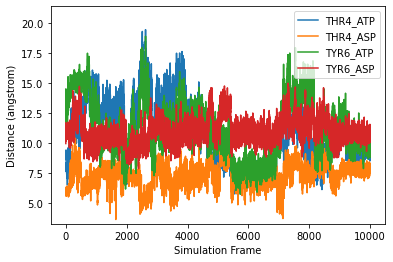

In [232]:
import os
import numpy as np

distance_file = os.path.join('..','data', 'distance_data_headers.csv')
distances = np.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(np.float64)

print (data)

import matplotlib.pyplot as plt

sample = headers[1]
data_min = numpy.min(data[:,1:])*0.9
data_max = numpy.max(data[:,1:])*1.1

for col in range(1, len(headers)):
    fig = plt.plot(data[:,col], label=headers[col])
    plt.legend()

#plt.figure()     #This initializes a new figure
plt.ylim(data_min, data_max)
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')

plt.savefig('allsamples.png', dpi=300)

[1.000e+00 1.010e+02 2.010e+02 3.010e+02 4.010e+02 5.010e+02 6.010e+02
 7.010e+02 8.010e+02 9.010e+02 1.001e+03 1.101e+03 1.201e+03 1.301e+03
 1.401e+03 1.501e+03 1.601e+03 1.701e+03 1.801e+03 1.901e+03 2.001e+03
 2.101e+03 2.201e+03 2.301e+03 2.401e+03 2.501e+03 2.601e+03 2.701e+03
 2.801e+03 2.901e+03 3.001e+03 3.101e+03 3.201e+03 3.301e+03 3.401e+03
 3.501e+03 3.601e+03 3.701e+03 3.801e+03 3.901e+03 4.001e+03 4.101e+03
 4.201e+03 4.301e+03 4.401e+03 4.501e+03 4.601e+03 4.701e+03 4.801e+03
 4.901e+03 5.001e+03 5.101e+03 5.201e+03 5.301e+03 5.401e+03 5.501e+03
 5.601e+03 5.701e+03 5.801e+03 5.901e+03 6.001e+03 6.101e+03 6.201e+03
 6.301e+03 6.401e+03 6.501e+03 6.601e+03 6.701e+03 6.801e+03 6.901e+03
 7.001e+03 7.101e+03 7.201e+03 7.301e+03 7.401e+03 7.501e+03 7.601e+03
 7.701e+03 7.801e+03 7.901e+03 8.001e+03 8.101e+03 8.201e+03 8.301e+03
 8.401e+03 8.501e+03 8.601e+03 8.701e+03 8.801e+03 8.901e+03 9.001e+03
 9.101e+03 9.201e+03 9.301e+03 9.401e+03 9.501e+03 9.601e+03 9.701e+03
 9.801

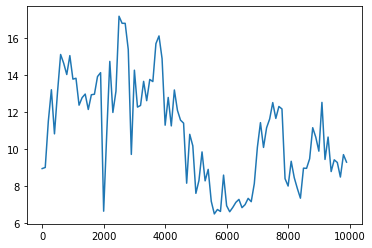

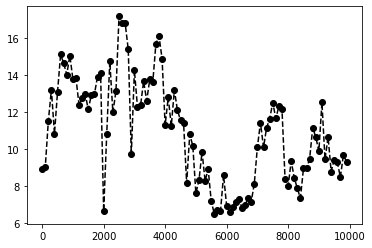

In [243]:
print(data[0::100,0])
plt.figure()
plt.plot(data[0::100,0], data[0::100,1])
plt.figure()
plt.plot(data[0::100,0], data[0::100,1], '--ok')

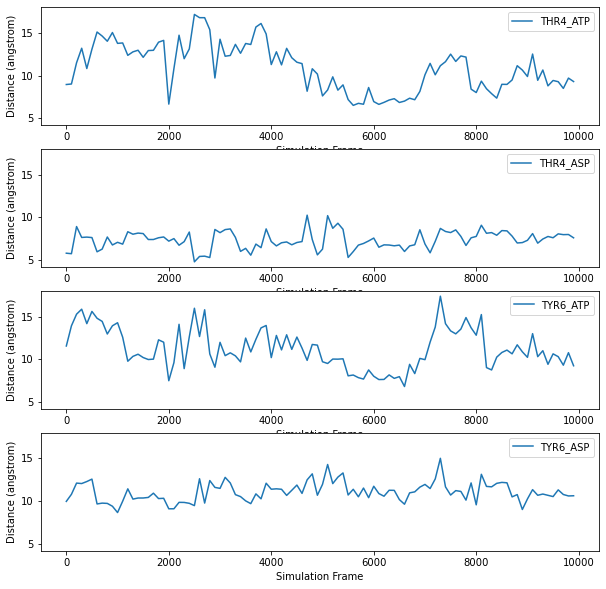

In [249]:
fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10, 10), sharey=True)

for col in range(1, len(headers)):
    sample = headers[col]
   
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('Simulation Frame')
    ax[col-1].set_ylabel('Distance (angstrom)')
    ax[col-1].legend()

## Functions

In [271]:
import os
import numpy as np

#file_location = os.path.join('..','data', 'water.xyz')

def open_xyz(file_location):
    xyz_file = np.genfromtxt(fname=file_location, dtype='unicode', skip_header=2)
    natoms = len(xyz_file[:,0])
    symbols = xyz_file[:,0]
    data = xyz_file[:,1:]
    data = data.astype(np.float64)
    return symbols, data, natoms

#symbols, data, natoms = open_xyz(file_location)

def calculate_distance(atom1_coord, atom2_coord):
    """Calculate the distance between two three-dimensional points."""
    
    x_distance = atom1_coord[0] - atom2_coord[0]
    y_distance = atom1_coord[1] - atom2_coord[1]
    z_distance = atom1_coord[2] - atom2_coord[2]
    bond_length_12 = numpy.sqrt(x_distance ** 2 + y_distance ** 2 + z_distance ** 2)
    return bond_length_12

def bond_check(atom_distance, min_length, max_length):
    if atom_distance > min_length and atom_distance <= max_length:
        return True
    else:
        return False
    
def print_bonds(symbols, natoms, data):
    for i in range (natoms):
        for j in range (natoms):
            distance = calculate_distance(data[i],data[j])
            if bond_check(distance, 0, 1.5):
                if i<j:
                    print (F'{symbols[i]} to {symbols[j]} : {distance:.3f}')
                    


In [272]:
file_location = os.path.join('..','data', 'water.xyz')
symbols, data, natoms = open_xyz(file_location)

print(F'Printing bonds for water.')
print_bonds(symbols, natoms, data)

Printing bonds for water.
O to H1 : 0.969
O to H2 : 0.969


In [273]:
file_location = os.path.join('..','data', 'benzene.xyz')
symbols, data, natoms = open_xyz(file_location)

print(F'Printing bonds for benzene.')
print_bonds(symbols, natoms, data)

Printing bonds for benzene.
C to H : 1.088
C to C : 1.403
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
C to C : 1.403
C to H : 1.088
